# Flying Drones Around Powerlines

### Machine learning can find an affordable method to identify and classify unusable thermal images.

## Intro
Thermal imaging cameras mounted on drones can detect hot spots on electrical systems prior to equipment failure.  These failures result in financial costs to the utility companies, inconvenience to customers, and safety issues to the electrical linemen. The use of drones vs. helicopters for obtaining the images provides significant cost savings. 

In [1]:
import rasterio as rio
import numpy as np
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import linear_model
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import sys
sys.path.insert(0, 'C:/Users/micha/github/uav-image-analysis/scripts/')
import fit_models

os.chdir("/Users/micha/ea-applications")

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


C:\Users\micha\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


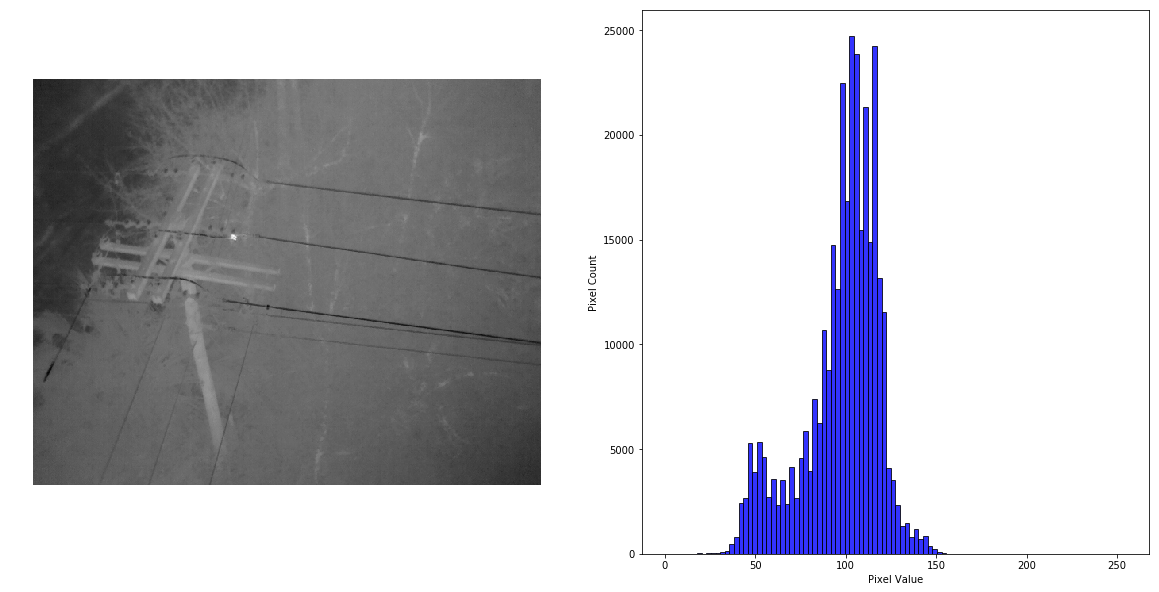

In [2]:
path = glob("data/training-test-images/Thermal/2019-02-16/101MEDIA/DJI_0480.jpg")

for im in path:
    with rio.open(im) as src:
        image = src.read()
        
        fig,ax = plt.subplots(1,2,figsize=(20,10))
        ax[0].axis('off')
        ax[0].imshow(image[0], cmap = "gray")
        ax[1].hist(image[0].flatten(), bins=100, facecolor='b', edgecolor='k', alpha=.8)
        ax[1].set(xlabel="Pixel Value", ylabel="Pixel Count")
        plt.show()

## Good Image
Here is a typical thermal image of powerlines, utility pole, and equipment.  Note the hot-spot on one of the connections. Not all images provided by the drone operator, however, are useable like this one.  Unusable images include blacked-out, saturated, or blurred.  Currently, a thermographer charges the customer to identify these bad images in addition to analyzing the good ones.  Let's see how we can train one or more machine learning or predictive models to identify the bad images, while minimizing false negatives (ie. misidentifying the good images). 

C:\Users\micha\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


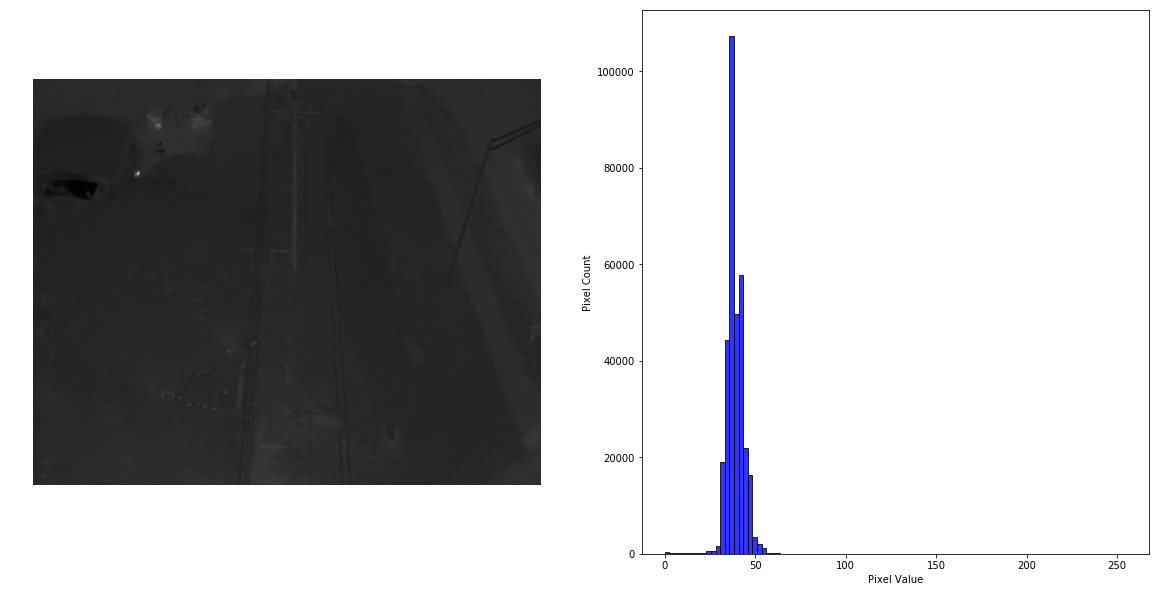

In [3]:
path = glob("data/training-test-images/Thermal/2019-02-16/101MEDIA/DJI_0116.jpg")

for im in path:
    with rio.open(im) as src:
        image = src.read()
        
        fig,ax = plt.subplots(1,2,figsize=(20,10))
        ax[0].axis('off')
        ax[0].imshow(image[0], cmap = "gray")
        ax[1].hist(image[0].flatten(), bins=100, facecolor='b', edgecolor='k', alpha=.8)
        ax[1].set(xlabel="Pixel Value", ylabel="Pixel Count")
        plt.show()

## Blacked-Out Image
Note the histogram skewed to the left with highly concentrated brightness values for this blacked-out image. 

C:\Users\micha\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


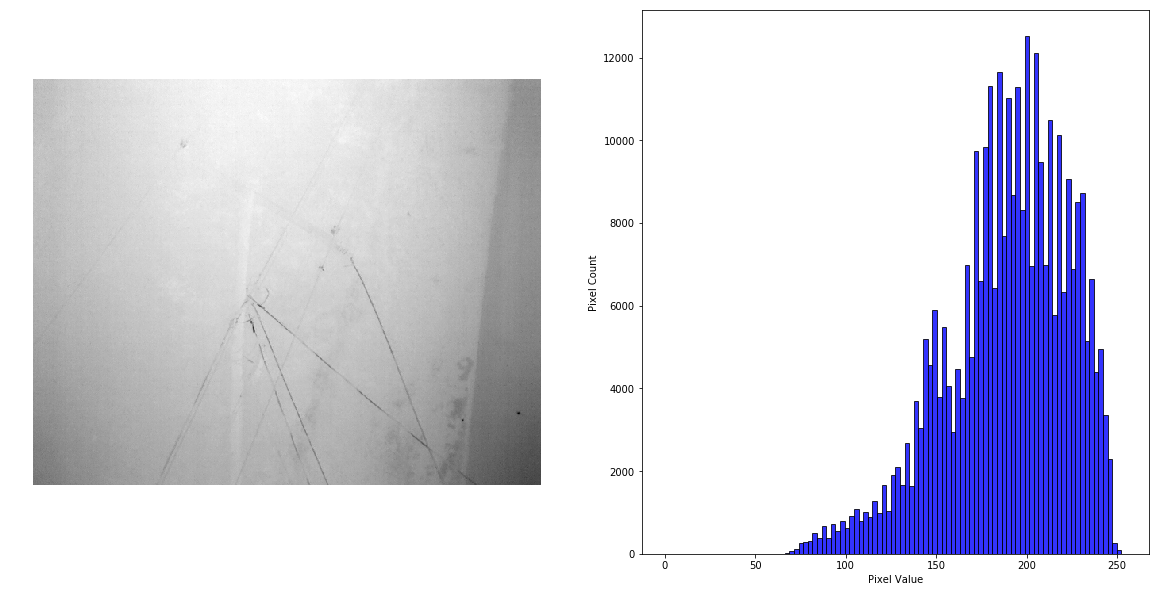

In [4]:
path = glob("data/training-test-images/Thermal/2019-02-17/100MEDIA/DJI_0001.jpg")

for im in path:
    with rio.open(im) as src:
        image = src.read()
        
        fig,ax = plt.subplots(1,2,figsize=(20,10))
        ax[0].axis('off')
        ax[0].imshow(image[0], cmap = "gray")
        ax[1].hist(image[0].flatten(), bins=100, facecolor='b', edgecolor='k', alpha=.8)
        ax[1].set(xlabel="Pixel Value", ylabel="Pixel Count")
        plt.show()

## Saturated Image
Brightness values for saturated images tend to skew to the right side of the histogram.

C:\Users\micha\Anaconda3\lib\site-packages\rasterio\__init__.py:216: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


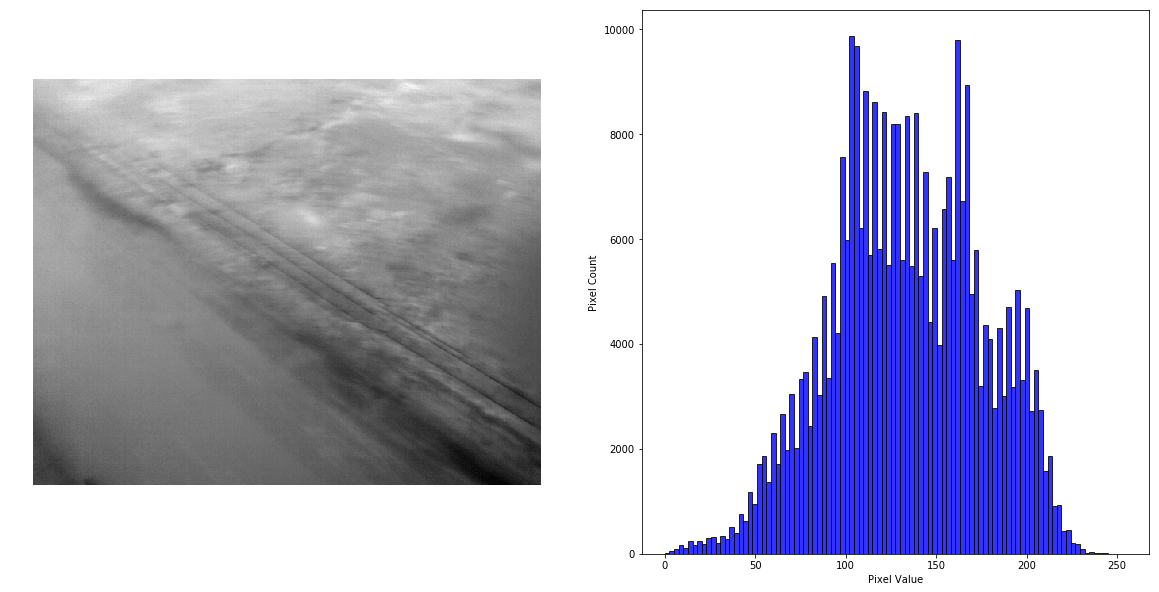

In [5]:
path = glob("data/training-test-images/Thermal/2019-02-16/101MEDIA/DJI_0102.jpg")

for im in path:
    with rio.open(im) as src:
        image = src.read()
        
        fig,ax = plt.subplots(1,2,figsize=(20,10))
        ax[0].axis('off')
        ax[0].imshow(image[0], cmap = "gray")
        ax[1].hist(image[0].flatten(), bins=100, facecolor='b', edgecolor='k', alpha=.8)
        ax[1].set(xlabel="Pixel Value", ylabel="Pixel Count")
        plt.show()

## Blurred Image
A blurred image, however, does not always differentiate well from an acceptable image. 

## Challenges
The data provided to me was unbalanced, with good images highly outnumbering all of the bad ones combined. However, other datasets may contain more bad images.  The lack of data was an impediment to applying the Convolutional Neural Net (CNN) model in addition to the others.  And while classification of "Good" and "Blacked-Out" images showed a high level of accuracy, the learning models did not perform as well for the "Saturated" and "Blurry" images.     

## Application
I applied different machine learning and predictive models to the data to see which one is best for classifying the images, including Support Vector Machine (SVM), Logistic Regression, Random Forest, and Gradient Boosting (for more information on the different methods, see my GitHub page https://github.com/mlevis1/uav-image-analysis).  

In [6]:
df_train = pd.read_csv('/Users/micha/ea-applications/data/test-images.csv')

paths = '/Users/micha/ea-applications/data/training-test-images/Thermal/mytest/*MEDIA/'

train_images = fit_models.read_images(paths)

y = np.array(df_train['Label'])

y = df_train['Label'].values

X_train, X_test, y_train, y_test = train_test_split(train_images, y, random_state=42, test_size=0.4)

(431, 327680)


In [7]:
# Run random forest classifier
model = RandomForestClassifier()
model_logistic, probabilities, y_pred = fit_models.supervised_models(model, X_train, y_train, X_test, y_test)

             precision    recall  f1-score   support

          0       0.86      0.95      0.91       133
          1       0.89      1.00      0.94         8
          2       0.58      0.50      0.54        14
          3       0.40      0.11      0.17        18

avg / total       0.79      0.83      0.80       173



## Results
The Random Forest Classifier is similar to a decision tree analysis, and provided the best accuracy with the test data as shown below. Recall is the best measure of accuracy when avoiding false negatives is a key objective.

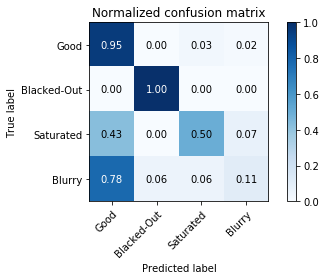

In [8]:
class_labels=['Good', 'Blacked-Out', 'Saturated', 'Blurry']

np.set_printoptions(precision=2)

# Plot normalized confusion matrix
fit_models.plot_confusion_matrix(y_test, y_pred, classes=class_labels, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Confusion Matrix
The confusion matrix shows the performance of the learning model, in this case the Random Forest Classifier.  You can see the high level of accuracy for "Good" and "Blacked-Out" images, while only about two-thirds of "Saturated" images tested accurately, and almost all of the "Blurry" images were misclassified as "Good".

## Conclusion
I'll save the trained Random Forest Classifier for future application to new, unlabeled images.  Given the poor performance of the "Saturated" and "Blurry" categories, I considered removing them from the model.  However, they are accurate some of the time (50% for "Saturated"), without significant effect on the outcome for "Good" images.  Additional testing with new data would allow additional validation by an actual person.  I would also like obtain additional training data in order to further expore the Convolutional Neural Net (CNN) learning model.  